**Project Name - Restaurant Data Analysis (Level 1)**





**Project Type - EDA**

**Industry - Cognifyz Techonologies**

**Participant Name - Swapna Devare**






**Project Summary :**

This is an internship task received from Cognifyz Technologies. In this task they provided the Restaurant Dataset to analyse trend, patterns of the restaurants.
In this level 1 task there are mainly 3 tasks are included:

**1. Data Exploration and Preprocessing**
We need to identify the shape of data, null values, column attributes, numeric columns, categorical columns, statistical analysis of numeric columns and distribution of categorical columns.

**2.  Descriptive Analysis**
Here, need to find statistical values such as count, mean, median, mode, standard deviation etc. (FOR numeric values)
and for categorical values need to identify total count and mode values.

**3. Geospatial Analysis**
Visualized restaurant locations on maps using latitude and longitude data.

Conducted an analysis of restaurant distribution across different cities and countries.

Explored potential correlations between restaurant locations and ratings.

In this notebook I includes these three insights of level 1 task. The basics principles of Data Science consist are Data preprocessing, EDA, Statistical Analysis and additional part is the Geospatial Analysis (it used to idetify the Restaurant locations from the world map).

**Problem Statement**
In the problem statement, we focuses on Restaurant dataset. The dataset consist 20 attributes, such as Restaurant code, Restaurant name, Rating, Votes, Price Rating, Booking details, and so on.
The tasks are :

Data Preparation - Find all columns(how many numeric and how many categorical) and their data types. Find the shape of data, Find the missing or null values.

Descriptive Analysis -  Find statistical values such as count, mean, median, mode, standard deviation etc. (FOR numeric values) and for categorical values need to identify total count and mode values.

Geospatial Analysis - In this analysis, need to find restaurant locations in world map and analyse trend of popular foods.


## ***Task 1. Data Exploration and Preprocessing***


**Import all Libraries**

In [131]:
# Importing All Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset Loading**

In [132]:
# First need to import (google. colab import drive) library to import Excel data from Google Drive.
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Restaurant_data.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**View the dataset**

In [133]:
# View the First Five Rows
df.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French,...,Botswana Pula,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana Pula,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood,...,Botswana Pula,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese,...,Botswana Pula,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese,...,Botswana Pula,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Dataset Rows and Column Count**

In [134]:
# Recognised Shape of the Dataset
print("Number of Rows are:", df.shape[0])
print("Number of Columns are:", df.shape[1])

Number of Rows are: 9551
Number of Columns are: 21


**Duplicate Values**

In [135]:
# Checking for Duplicate Values
dp = df.duplicated().sum()
print("Number of Duplicated values are:", dp)

Number of Duplicated values are: 0


**Missing Values/Null Values**

In [136]:
# Checking the NULL Values
df.isnull().sum()


Restaurant_ID           0
Restaurant_Name         7
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price_range             0
Aggregate_rating        0
Rating color            0
Rating_text             0
Votes                   0
dtype: int64

**Handling Missing Values**

In [158]:
# Cuisines and Restaurant Name has a few Missing Rows, so these Rows are removed.
df = df.dropna(subset = ['Cuisines'])
df = df.dropna(subset = ['Restaurant_Name'])

In [138]:
# Checking for whether there is any Null value or Not.
df.isna().sum()

Restaurant_ID           0
Restaurant_Name         7
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price_range             0
Aggregate_rating        0
Rating color            0
Rating_text             0
Votes                   0
dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9542 non-null   int64  
 1   Restaurant_Name       9535 non-null   object 
 2   Country_Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality_Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

**Distribution of the Target Variable**

In [157]:
# Aggregation Ratings Values Count
target_variable = df['Aggregate_rating'].value_counts()
print(target_variable)

Aggregate_rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


**What did I found insights from the Level 1 (Task 1)**



*  The dataset provided by Congifyz its about Restaurant information from all over world.
*  There are multiple attributes such as Restaurant Name, Restaurant ID, Country Code, City, Address, Longitude, Latitude, Cuisines, Currency, Price range, Aggregate rating, Votes etc.
*  In this Restaurant Dataset we have total 9551 Rows and 21 Columns with 9 missing values in the Cuisines column and 7 rows in the Restaurant name column.
So, for minimum value I remove the duplicate Rows.
*  The provided specific task which is distirbution of Aggregate Rating(Target Variable) is well balanced.


## ***Task 2 : Descriptive Analysis***

**Statistical Measures for Numerical Columns.**

In [141]:
# Statistical Analysis for Numeric Columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
summary_stats = numeric_columns.describe()
print(summary_stats)

       Restaurant_ID  Country_Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    73.243559    26.985681   
std     8.791967e+06     56.451600    21.535309     7.818916   
min     5.300000e+01      1.000000     0.000000     0.000000   
25%     3.019312e+05      1.000000    77.095519    28.481113   
50%     6.002726e+06      1.000000    77.205251    28.572237   
75%     1.835260e+07      1.000000    77.300372    28.644585   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price_range  Aggregate_rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

**Individual Statistics**

In [142]:
# Calculate Mean for Numeric Columns
mean_values = numeric_columns.mean()
print("Mean for Numerical Columns is :")
print(mean_values)

Mean for Numerical Columns is :
Restaurant_ID           9.043301e+06
Country_Code            1.817921e+01
Longitude               7.324356e+01
Latitude                2.698568e+01
Average Cost for two    1.200326e+03
Price_range             1.804968e+00
Aggregate_rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [143]:
# Calculate Median for Numeric Columns
median_values = numeric_columns.median()
print("Mean for Numerical Columns is :")
print(median_values)

Mean for Numerical Columns is :
Restaurant_ID           6.002726e+06
Country_Code            1.000000e+00
Longitude               7.720525e+01
Latitude                2.857224e+01
Average Cost for two    4.000000e+02
Price_range             2.000000e+00
Aggregate_rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [144]:
# Calculate Standerd deviation for Numeric Columns
Standerd_deviation = numeric_columns.std()
print("Standerd deviation for Numerical Columns is :")
print(Standerd_deviation)

Standerd deviation for Numerical Columns is :
Restaurant_ID           8.791967e+06
Country_Code            5.645160e+01
Longitude               2.153531e+01
Latitude                7.818916e+00
Average Cost for two    1.612874e+04
Price_range             9.055631e-01
Aggregate_rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


**Distribution of Categorical Variables**

#### Here I plot the BOX PLOT to show the distribution of Price Range against Rating Text.

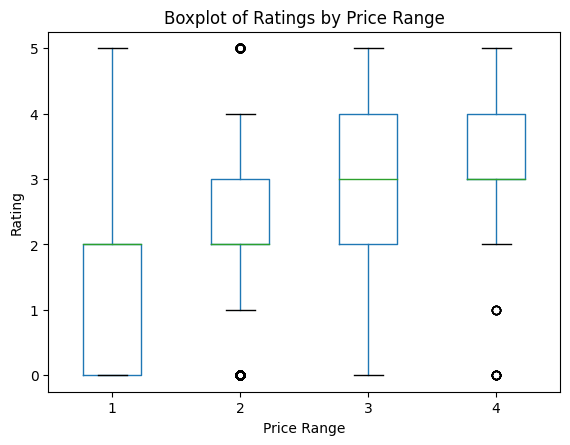

In [156]:
# Convert 'Rating text' to a numeric representation if it's not already
# For example, if 'Rating text' has categories like 'Excellent', 'Very Good', etc.,
# you might need to map them to numerical values.
# Here's a simple example assuming ordinal categories:
rating_mapping = {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent': 5}
df['Rating'] = df['Rating_text'].map(rating_mapping)

# Create a boxplot using the rating column
df.boxplot(column='Rating', by='Price_range', grid=False)
plt.title('Boxplot of Ratings by Price Range')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

#### Here I plotted the BAR PLOT. In this plot we can see the all type of Cuisines are included in the dataset and this BAR PLOT shows the count or distribution according to Cuisines Types.

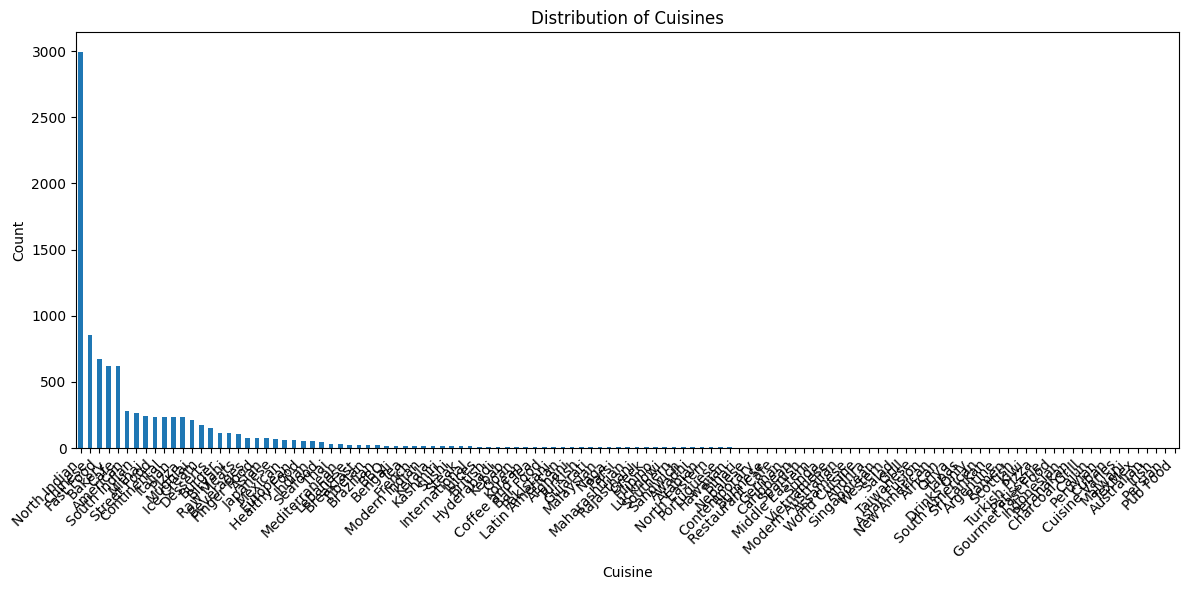

In [146]:
# Step 4: Plot the distribution of 'Cuisines' using a bar plot
plt.figure(figsize=(12, 6))
df['Cuisines'].value_counts().plot(kind='bar')
plt.title('Distribution of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Distribution of categorical variables like 'Country Code', 'City', and 'Cuisines'


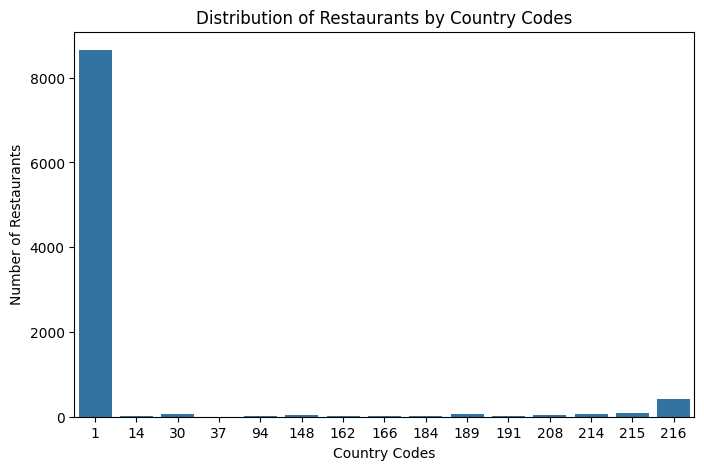

In [152]:
# Count Plot Visualization Code for Country Codes
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
sns.countplot(x = df['Country_Code'])

# Set Labels
plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

# Display Chart
plt.show()

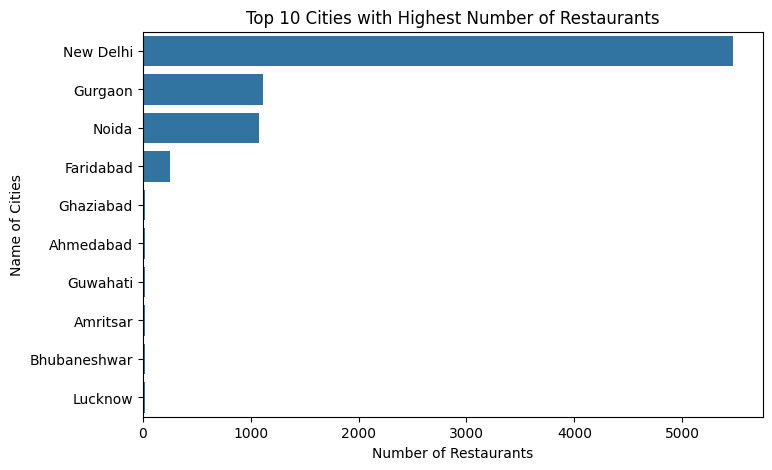

In [153]:
# Count Plot Visualization Code for Cities
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Top 10 Cities with Highest Number of Restaurants')

# Display Chart
plt.show()


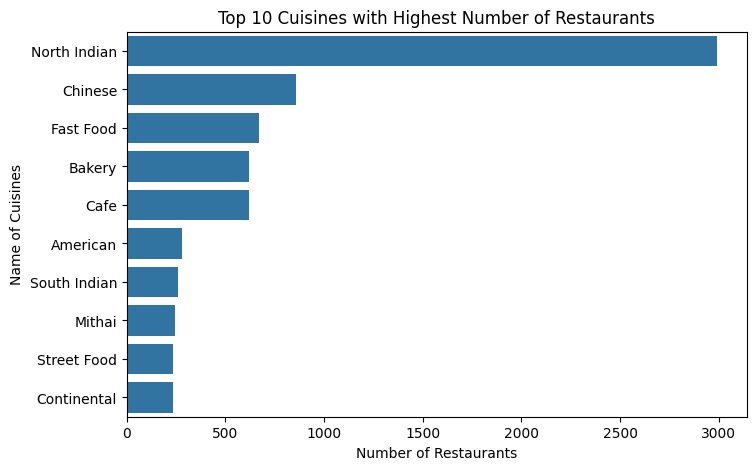

In [154]:
# Count Plot Visualization Code for Cuisines
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cuisine names present in the data, so i select only the top 10 cuisines
sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

# Display Chart
plt.show()

**What did I find insights from the Level 1 (Task 2)**

* Measure the statistical values for numeric columns such as  Restaurant ID,Country, Code, Longitude, Latitude, Average Cost for two, Price range, Aggregate rating, and Votes.
* The high range of Price foods has a high Rate and Price foods have a Low Rate
* The top majority of foods such as North Indian, Chinese, and Fast food has highest number of restaurants.
* Country code 1 and 216 are with the highest number of restaurants.
* New Delhi, Gurgaon and Noida are in top with highest number of restaurants.

***Task 3 : Geospatial Analysis***

**Visualise Restaurant Locations on Map.**

<ipython-input-148-bdc3a95bfa3a>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


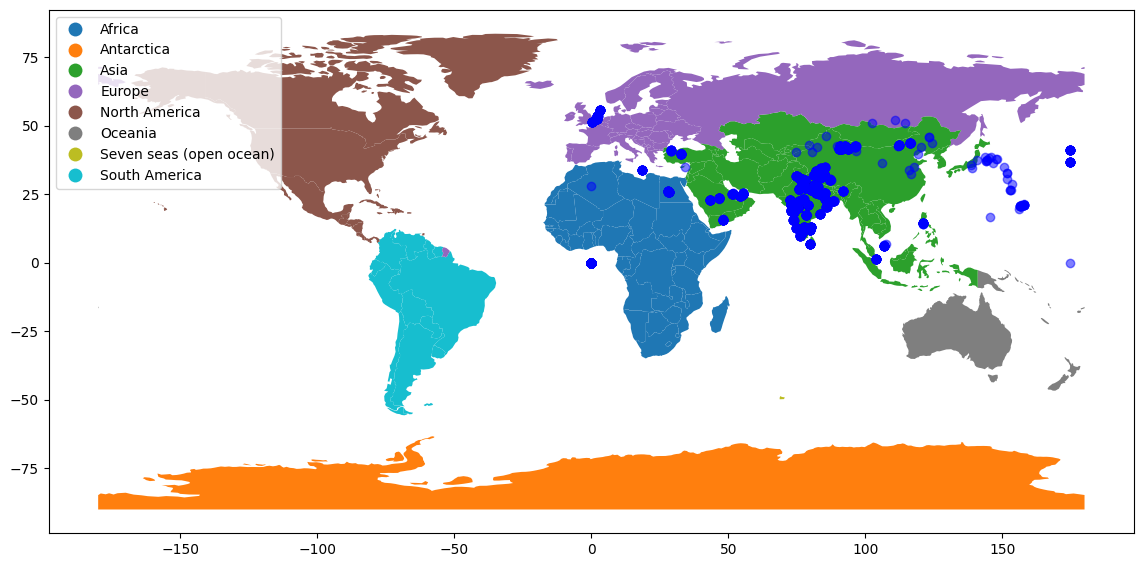

In [148]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load your dataset
# Assuming you have a CSV file with 'latitude' and 'longitude' columns


# Create geometry column from latitude and longitude
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)


# Create a base map of the world using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the GeoDataFrame

gdf.plot(ax=world.plot("continent", markersize=10, legend = True, figsize=(14, 12)), marker = 'o',color='blue', alpha=0.5)

plt.show()

Distribution of Restaurants by Cities.

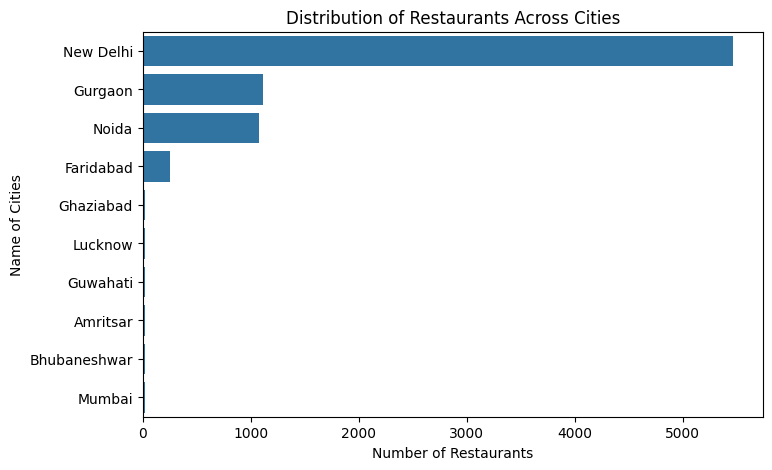

In [167]:

# Distribution of restaurants across different cities or countries
# Set plot size
plt.figure(figsize=(8, 5))

# Create the figure object
# There are many cities names present in the data, so i select only the top 10 cities
sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')

# Display Chart
plt.show()

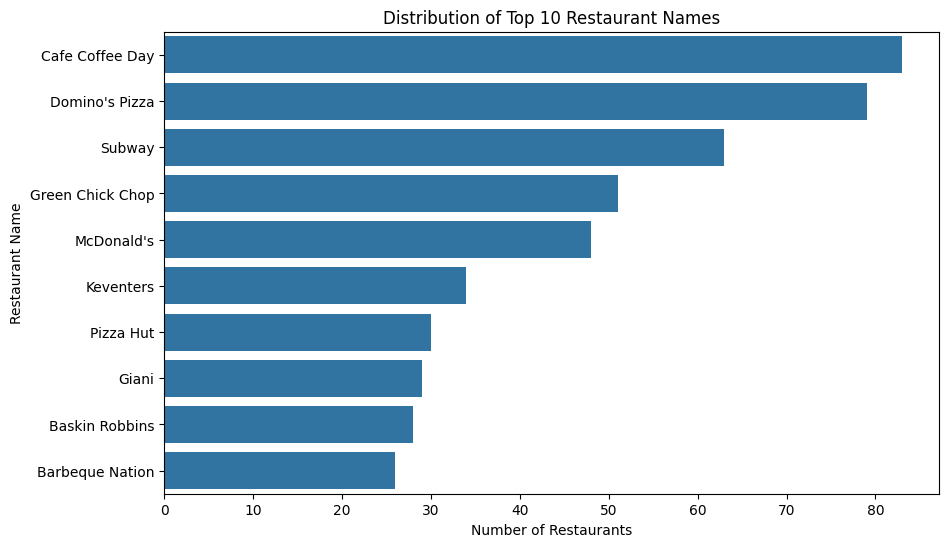

In [166]:
plt.figure(figsize=(10, 6))

# Create the count plot for the top 10 restaurant names
# Pass 'Restaurant_Name' as the y-axis and group by 'City' using the hue parameter
sns.countplot(y='Restaurant_Name', data=df,
              order=df['Restaurant_Name'].value_counts().iloc[:10].index)

# Set Labels
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Name')
plt.title('Distribution of Top 10 Restaurant Names')

# Display Chart
plt.show()

Correlation Between Restaurant's Location and it's Rating.

**What did I found insights from the level 1 (Task 3)?**


* Most of the Restaurants are found in Asia Countries and India has the majority.
* New Delhi city has most of the Restaurant count.



**Conclusion :-**

The insights which i found from the overall level 1 project:

**Data Overview:**



*  The dataset provided by Congifyz its about Restaurant information from all over world.
*  There are multiple attributes such as Restaurant Name, Restaurant ID, Country Code, City, Address, Longitude, Latitude, Cuisines, Currency, Price range, Aggregate rating, Votes etc.
*  In this Restaurant Dataset we have total 9551 Rows and 21 Columns with 9 missing values in the Cuisines column and 7 rows in the Restaurant name column.
So, for minimum value I remove the duplicate Rows.
*  The provided specific task which is distirbution of Aggregate Rating(Target Variable) is well balanced.





**Descriptive Insights:**



* Measure the statistical values for numeric columns such as  Restaurant ID,Country, Code, Longitude, Latitude, Average Cost for two, Price range, Aggregate rating, and Votes.
* The high range of Price foods has a high Rate and Price foods have a Low Rate
* The top majority of foods such as North Indian, Chinese, and Fast food has highest number of restaurants.
* Country code 1 and 216 are with the highest number of restaurants.
* New Delhi, Gurgaon and Noida are in top with highest number of restaurants.


**Geospatial Analysis:**


* Most of the Restaurants are found in Asia Countries and India has the majority.
* New Delhi city has most of the Restaurant count.

These insights offer a comprehensive analysis of the restaurant dataset reveals key data characteristics, descriptive insights, and geospatial patterns, informs further analysis.

